<a href="https://colab.research.google.com/github/luzyi0/2025-Vision_Computer_TI2B/blob/main/JOBSHEET02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRAKTIKUM

## Praktikum D1 - Memulai Klasifikasi Gambar dengan Dataset Sederhana

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


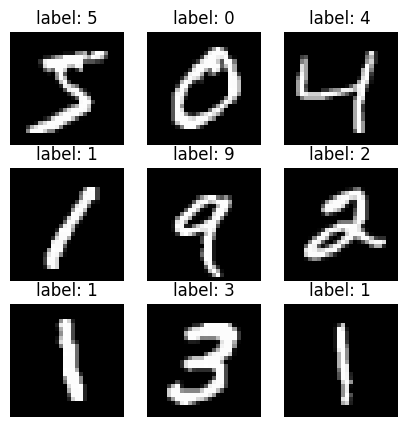

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# tampilankan contoh
plt.figure(figsize=(5,5))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(x_train[i],cmap='gray')
  plt.title(f"label: {y_train[i]}")
  plt.axis('off')
plt.show()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


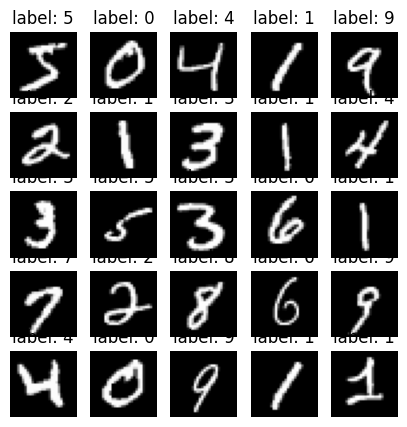

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# tampilankan contoh
plt.figure(figsize=(5,5))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(x_train[i],cmap='gray')
  plt.title(f"label: {y_train[i]}")
  plt.axis('off')
plt.show()

## Praktikum D2 - Klasifikasi Gambar dengan Model Machine Learning Tradisional

In [4]:
from sklearn import svm
from sklearn.metrics import accuracy_score

#Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

#SVM
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])  #gunakan subset karena berat
y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9101


In [6]:
from sklearn import svm
from sklearn.metrics import accuracy_score

#Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

#SVM
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])  #gunakan subset karena berat
y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9513


## Praktikum D3-Membangun CNN Sederhana

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 0.8909 - loss: 0.3730 - val_accuracy: 0.9780 - val_loss: 0.0769
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9788 - loss: 0.0689 - val_accuracy: 0.9837 - val_loss: 0.0614
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.9869 - loss: 0.0423 - val_accuracy: 0.9862 - val_loss: 0.0514
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.9910 - loss: 0.0288 - val_accuracy: 0.9890 - val_loss: 0.0446
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.9931 - loss: 0.0217 - val_accuracy: 0.9882 - val_loss: 0.0459


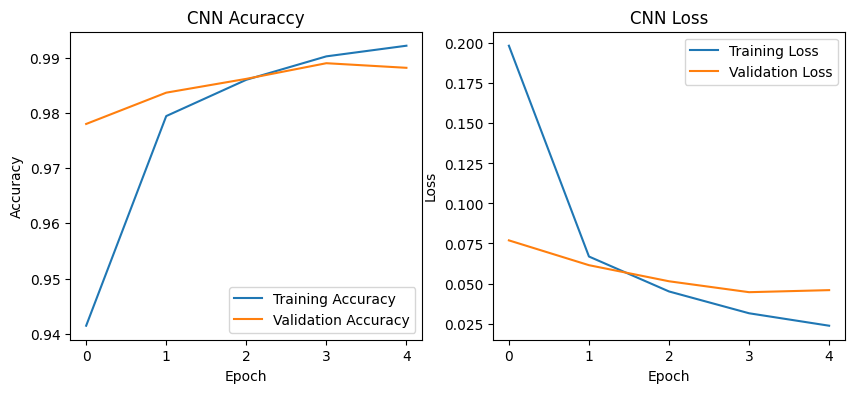

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential ([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ==== Plot history ====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Acuraccy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 64s 35ms/step - accuracy: 0.8912 - loss: 0.3517 - val_accuracy: 0.9848 - val_loss: 0.0551
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 78s 33ms/step - accuracy: 0.9836 - loss: 0.0516 - val_accuracy: 0.9873 - val_loss: 0.0384
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 56s 33ms/step - accuracy: 0.9895 - loss: 0.0338 - val_accuracy: 0.9895 - val_loss: 0.0380
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.9923 - loss: 0.0244 - val_accuracy: 0.9890 - val_loss: 0.0371
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9943 - loss: 0.0169 - val_accuracy: 0.9908 - val_loss: 0.0316


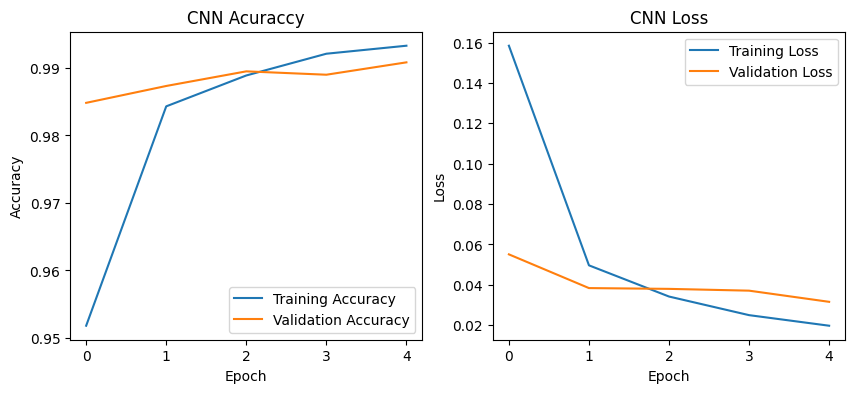

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential ([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ==== Plot history ====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Acuraccy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Praktikum D4-Eksperimen dengan Dataset Lebih Kompleks (CIFAR-10)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 69s 48ms/step - accuracy: 0.3638 - loss: 1.7415 - val_accuracy: 0.5542 - val_loss: 1.2568
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 66s 47ms/step - accuracy: 0.5645 - loss: 1.2310 - val_accuracy: 0.6162 - val_loss: 1.1026
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 79s 45ms/step - accuracy: 0.6255 - loss: 1.0655 - val_accuracy: 0.6220 - val_loss: 1.0798
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 64s 46ms/step - accuracy: 0.6635 - loss: 0.9647 - val_accuracy: 0.6628 - val_loss: 0.9837
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 86s 49ms/step - accuracy: 0.6894 - loss: 0.8950 - val_accuracy: 0.6698 - val_loss: 0.9396
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 77s 46ms/step - accuracy: 0.7045 - loss: 0.8457 - val_accuracy: 0.6692 - val_loss: 0.9607
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.7212 - loss: 0.7980 - val_accuracy: 0.6792 - val_loss: 0.9180
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 47ms/step - accuracy: 0.7399 -

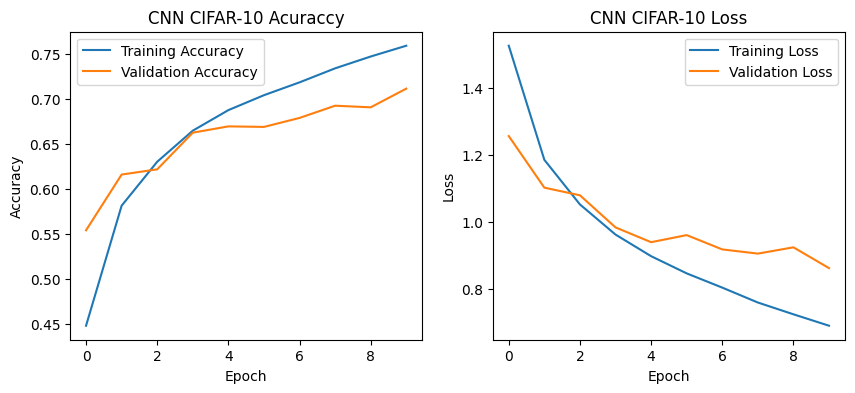

In [14]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ==== Plot history ====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Acuraccy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 68s 47ms/step - accuracy: 0.2715 - loss: 1.9480 - val_accuracy: 0.4878 - val_loss: 1.4567
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 66s 47ms/step - accuracy: 0.4344 - loss: 1.5404 - val_accuracy: 0.5652 - val_loss: 1.2554
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 84s 48ms/step - accuracy: 0.4901 - loss: 1.4089 - val_accuracy: 0.5828 - val_loss: 1.1701
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 47ms/step - accuracy: 0.5231 - loss: 1.3251 - val_accuracy: 0.6086 - val_loss: 1.0955
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - accuracy: 0.5461 - loss: 1.2524 - val_accuracy: 0.6294 - val_loss: 1.0581
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 45ms/step - accuracy: 0.5641 - loss: 1.2083 - val_accuracy: 0.6278 - val_loss: 1.0550
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.5868 - loss: 1.1566 - val_accuracy: 0.6486 - val_loss: 1.0073
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 86s 49ms/step - accuracy: 0.5984 -

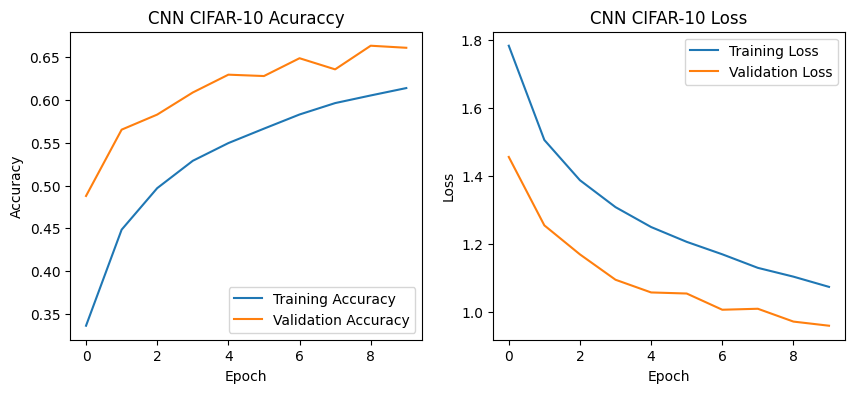

In [15]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ==== Plot history ====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Acuraccy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()